## sis_iv.py 用可視化ツールの template です。
- 概要：
  - 全 cell を実行すると、12 素子 の IV カーブ plot が表示されます
    - 100 GHz 帯 ( SSB ) 素子 : 8 個
    - 200 GHz 帯 ( 2SB ) 素子 : 4 個

### モジュールを import します。

In [1]:
import numpy as np
import pandas as pd
import matplotlib

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.facecolor'] = 'white'
import matplotlib.pyplot as plt

import necstdb

### database を読み込みます。

In [2]:
data_path = "./necst_sis_iv_20240815_191131"

db = necstdb.opendb(data_path)
filename = data_path.split("/")[-1].split(".")[0]
db.get_info()

,file size [byte],#records,record size [byte],format
table name,,,,
necst-NANTEN2-clock,19296,603,32,<dddd
necst-NANTEN2-ctrl-antenna-tracking_status,701525,28061,25,<d?dd
necst-NANTEN2-rx-sis_bias-sis_1LL,11800,295,40,<ddd?d7s
necst-NANTEN2-rx-sis_bias-sis_1LU,11800,295,40,<ddd?d7s
necst-NANTEN2-rx-sis_bias-sis_1RL,11800,295,40,<ddd?d7s
necst-NANTEN2-rx-sis_bias-sis_1RU,11800,295,40,<ddd?d7s
necst-NANTEN2-rx-sis_bias-sis_2L,11466,294,39,<ddd?d6s
necst-NANTEN2-rx-sis_bias-sis_2R,11505,295,39,<ddd?d6s
necst-NANTEN2-rx-sis_bias-sis_3L,11505,295,39,<ddd?d6s


### beam ごとに、パラメーターをディクショナリに格納します。
- パラメーター
  - SIS Voltage ( mV )
  - SIS Current ( uA )

In [3]:
beam_list = [
    'sis_2L', 'sis_2R', 'sis_3L', 'sis_3R',
    'sis_4L', 'sis_4R', 'sis_5L', 'sis_5R', 
    'sis_1LU', 'sis_1LL', 'sis_1RU', 'sis_1RL'
]

topic_list = [f"necst-NANTEN2-rx-sis_bias-{beam}" for beam in beam_list]

array_data = {}
for topic in topic_list:
    array_data[topic] = db.open_table(topic).read(astype='sa') 

### IV カーブ を plot します。

info : Saved image. ( sis_iv_v4_necst_sis_iv_20240815_191131.png )


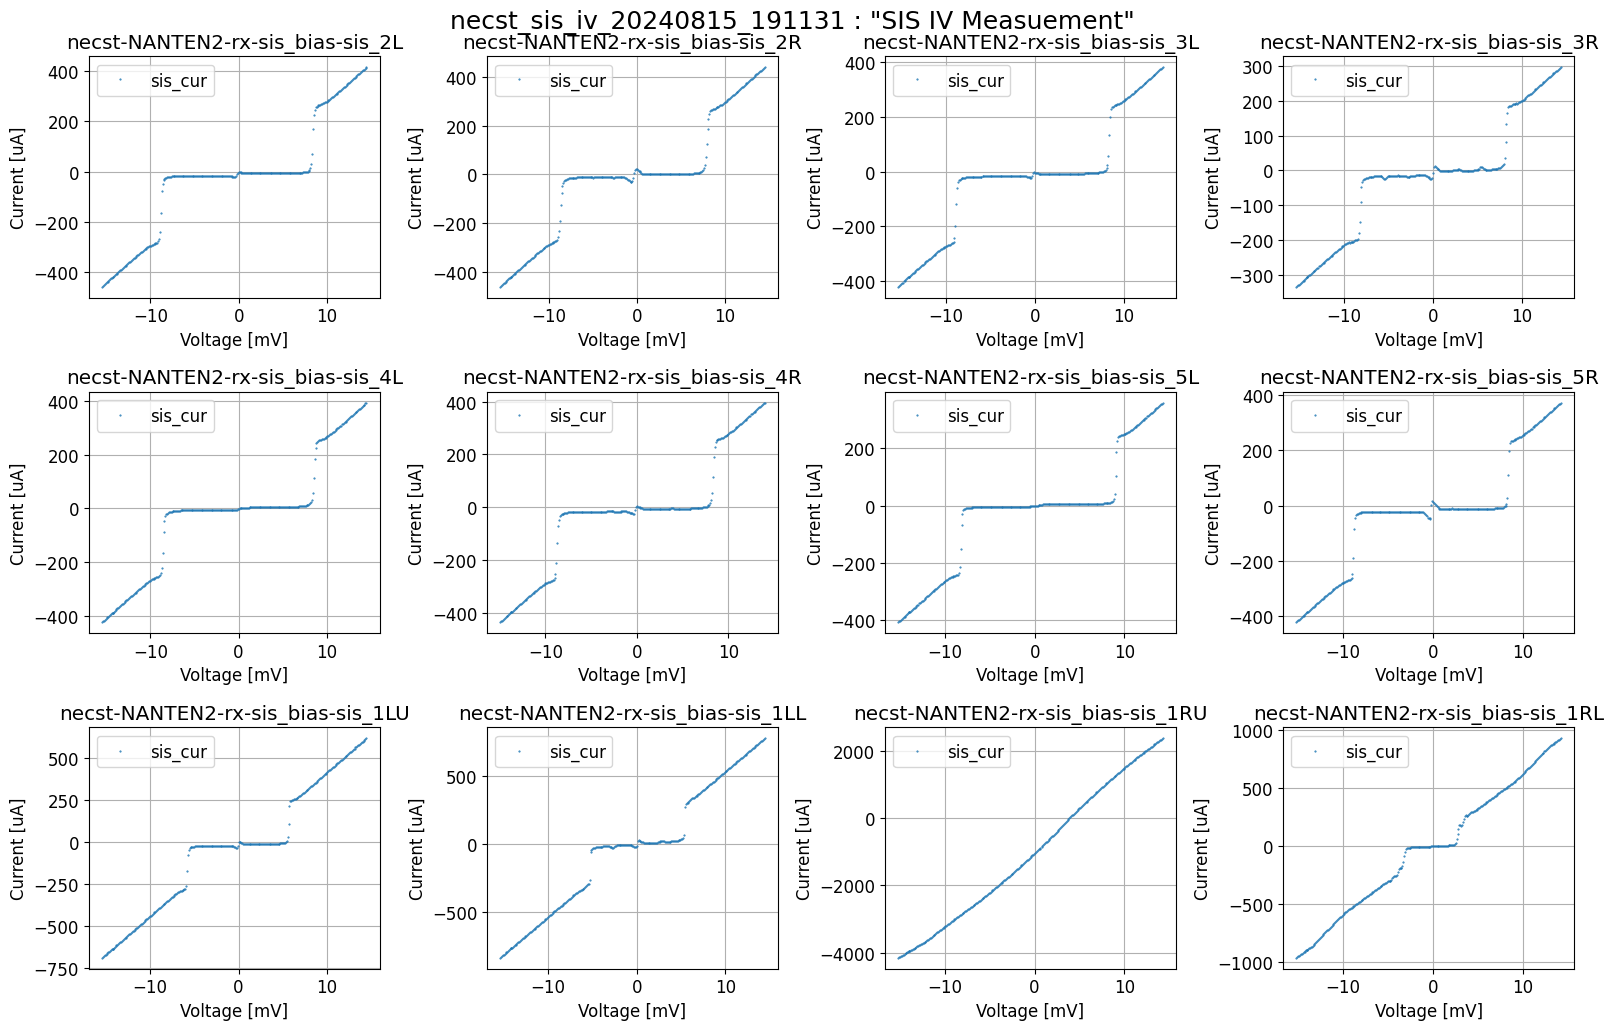

In [5]:
ncol = 4
nrow = 3
nax = ncol * nrow

figsize = (ncol * 4, nrow * 3.5)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, key, data in zip(ax, array_data.keys(), array_data.values()):
    _ax.plot(data["voltage"], data["current"], '.', markersize=1, label='sis_cur')
    _ax.set_xlabel('Voltage [mV]')
    _ax.set_ylabel('Current [uA]')
    _ax.set_title(key)
    _ax.grid()
    _ax.legend()    
    
plt.suptitle((f'{filename} : "SIS IV Measuement"'), fontsize=18)
plt.subplots_adjust(wspace=0.25, hspace=0.25, bottom=0.05)
plt.tight_layout()
plt.subplots_adjust(top=0.935)

#fignamvooe = '{date}_{mode}'.format(**locals())
plt.savefig('./sis_iv_v4_{}.png'.format(filename))
print('info : Saved image. ( sis_iv_v4_{}.png )'.format(filename))